       Development of a Widget
The object of this notebook is providing a widget that will compare the level of ozone pollution of two cities:

Montpellier and Paris 13e.

The idea is to answer the following question:

Does it exist a significant level of ozone pollution between two cities?

In [2]:
import os
import sys
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 100})  # 
%matplotlib notebook

In [3]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from statsmodels.formula.api import ols
import statsmodels.api as sm

directory = Path.cwd() 
directory = directory.joinpath('prebuiltimages')
def my_saving_display(fig, directory, image_name, imageformat="pdf",
                      saving=False):
    """"Saving with personal function."""
    if saving is True:
        fig.savefig(directory.joinpath(image_name + '.' + imageformat),
                    
                    format=imageformat) 

1) Data importation 

We import data from the following website:

http://www.airparif.asso.fr/telechargement/confirme/id/06bb94ba3f23ad75144acf9bce05d014

http://data-atmo-occitanie.opendata.arcgis.com/datasets/4a648b54876f485e92f22e2ad5a5da32_0

The first website is about Paris 13e data. It contents NO2, O3 and the date data.

The second one gives us the occitanie data which belows .Montpellier 

In [4]:
occ1 = pd.read_csv("Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv", sep="," , header=0 )
occ1.head()
occ2 = pd.read_csv("20190401_20200331-PA13_auto.csv", sep=";" , header=0)
occ2.head()

,date,heure,NO2,O3
0,NaN,NaN,microg/m3,microg/m3
1,01/04/2019,1.0,16,51
2,01/04/2019,2.0,16,48
3,01/04/2019,3.0,18,46
4,01/04/2019,4.0,21,40


2) Data treatment

We have to give a usable format to the date in order to exploit it.

In [5]:
occ2 = occ2[occ2.date.isna()==False]

In [7]:
occ2.head()

,date,heure,NO2,O3
1,01/04/2019,1.0,16,51
2,01/04/2019,2.0,16,48
3,01/04/2019,3.0,18,46
4,01/04/2019,4.0,21,40
5,01/04/2019,5.0,36,24


We notice that Paris 13e data is evaluated in hours.

So we will calculate the mean in days.

In [10]:
occ2=occ2[occ2['O3']!='n/d']
occ2['O3']=occ2['O3'].astype('float')
occ_PARIS13= occ2.groupby('date').agg({'O3':'mean'})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
occ_PARIS13.head()

,O3
date,
01/01/2020,3.291667
01/02/2020,51.000000
01/03/2020,53.458333
01/04/2019,64.625000
01/05/2019,61.250000


We must give the date a usable format to exploit datas:

In [13]:
occ1['date'] = pd.to_datetime(occ1['date_debut']).dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


We are going to see the cities of occitanie

In [14]:
occ1.nom_com.unique()

array(['MONTPELLIER', 'TOULOUSE', 'NIMES', 'BELESTA-EN-LAURAGAIS',
       'BIARS-SUR-CERE', 'PEYRUSSE-VIEILLE', 'MIRAMONT-DE-COMMINGES',
       'BESSIERES', 'BLAGNAC', 'LUNEL-VIEL', 'PERPIGNAN', 'CASTRES',
       'LOURDES', 'AGDE', 'TARBES', 'ALBI', 'SAINT-GELY-DU-FESC',
       'SAINT-GAUDENS', 'SAINT-ESTEVE', 'SAZE', 'LATTES', 'MONTGISCARD',
       'CORNEILHAN', 'SAINT-LAURENT-DES-ARBRES', 'LA CALMETTE', 'RODEZ',
       'CAUNES-MINERVOIS', 'MENDE', 'CARCASSONNE', 'ROQUEREDONDE',
       'VALLABREGUES'], dtype=object)

We will only focus one Montpellier data.

In [15]:
df =occ1[occ1['nom_com']=='MONTPELLIER']

We will only use O3 data

In [17]:
df =df[df['nom_poll']=='O3']

In [18]:
df.head()

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
73,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,96.5,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,771642,6277340,5074,2020-04
129,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,57.8,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,771642,6277340,5130,2020-01
250,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,49.7,ug.m-3,journaliere,2020-01-21T01:00:00.000Z,2020-01-22T00:00:00.000Z,t,771642,6277340,5251,2020-01
398,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,76.0,ug.m-3,journaliere,2020-02-29T01:00:00.000Z,2020-03-01T00:00:00.000Z,t,771642,6277340,5399,2020-02
579,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,41.3,ug.m-3,journaliere,2020-01-22T01:00:00.000Z,2020-01-23T00:00:00.000Z,t,771642,6277340,5580,2020-01


We are going to insert a column of date in Montpellier data. So we can compare it with O3 data of Paris 13e.

In [19]:
df['jour']=[str(x)[:10] for x in df['date_debut']]

In [20]:
df.head()

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date,jour
73,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,771642,6277340,5074,2020-04,2020-04-11
129,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,771642,6277340,5130,2020-01,2020-01-20
250,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,ug.m-3,journaliere,2020-01-21T01:00:00.000Z,2020-01-22T00:00:00.000Z,t,771642,6277340,5251,2020-01,2020-01-21
398,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,ug.m-3,journaliere,2020-02-29T01:00:00.000Z,2020-03-01T00:00:00.000Z,t,771642,6277340,5399,2020-02,2020-02-29
579,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,ug.m-3,journaliere,2020-01-22T01:00:00.000Z,2020-01-23T00:00:00.000Z,t,771642,6277340,5580,2020-01,2020-01-22


As we did it for Paris 13e we are going to evaluate the mean of O3 for Montpellier.

In [21]:
occ_Montpellier = df.groupby('jour').agg({'valeur':'mean'})

In [22]:
occ_Montpellier.head()

,valeur
jour,
2019-04-21,90.3
2019-04-22,90.1
2019-04-23,71.6
2019-04-24,94.1
2019-04-25,88.6


In [23]:
occ_Montpellier.columns=['O3']

In [24]:
occ_Montpellier.head() 

,O3
jour,
2019-04-21,90.3
2019-04-22,90.1
2019-04-23,71.6
2019-04-24,94.1
2019-04-25,88.6


We can now make the graphics

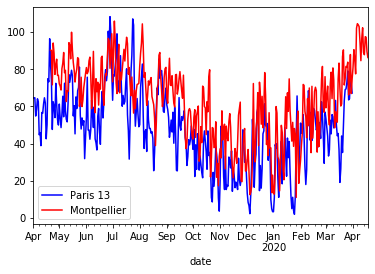

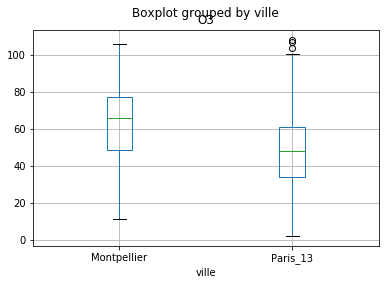

In [25]:
import datetime 
from datetime import datetime
occ_PARIS13['date'] = occ_PARIS13.index
occ_PARIS13['date'] = [ datetime.strptime(t, '%d/%m/%Y') for t in occ_PARIS13['date'].astype('str')]
occ_PARIS13['ville'] = 'Paris_13'
occ_PARIS13 = occ_PARIS13[['date', 'ville', 'O3']]
occ_PARIS13

occ_Montpellier['date'] = occ_Montpellier.index
occ_Montpellier['date'] = [ datetime.strptime(t, '%Y-%m-%d') for t in occ_Montpellier['date'].astype('str')]
occ_Montpellier['ville'] = 'Montpellier'
occ_Montpellier = occ_Montpellier[['date', 'ville', 'O3']]


df_final = pd.concat([occ_PARIS13, occ_Montpellier])
df_final = df_final.sort_values('date')
import matplotlib.pyplot as plt

# Line plot
ax = plt.gca()
df_final[df_final['ville'] == "Paris_13"].plot(kind='line',x='date',y='O3',ax=ax, color = 'blue', label = 'Paris 13')
df_final[df_final['ville'] == "Montpellier"].plot(kind='line',x='date',y='O3', color='red', ax=ax, label = 'Montpellier')
plt.show()

## Boxplot
df_final.boxplot('O3', by = 'ville')

In figure 1:  we see that the composition of 03 is higher in Montpellier than in Paris 13th
In figure 2: on the graph we see that the average of 03 on the city of Montpellier is higher and rises to around 70 microg / m3 while that of Paris 13e is 50 microg / m3

We go even further the pvalue.

In [26]:
results = ols('O3 ~ ville', data=df_final).fit()

In [27]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
ville,41403.665914,1.0,95.466043,2.883093e-21
Residual,314432.827102,725.0,NaN,NaN


We find that the PR(>F) is 2.883093e-21 of O3 pollution. it is  significant if we take the two cities.

that is to support our previous interpretation.